In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("data/accidents_2005_to_2007.csv")
df2 = pd.read_csv("data/accidents_2009_to_2011.csv")
df3 = pd.read_csv("data/accidents_2012_to_2014.csv")
traffic = pd.read_csv("data/ukTrafficAADF.csv")

df3.drop_duplicates()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002818,2012
7,201201BS70008,524010,182080,-0.213862,51.523975,1,3,2,1,07/01/2012,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002905,2012
8,201201BS70010,527710,179290,-0.161567,51.498077,1,3,2,1,07/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01002818,2012
9,201201BS70011,525120,180060,-0.198587,51.505576,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002825,2012


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
Accident_Index                                 570011 non-null object
Location_Easting_OSGR                          569910 non-null float64
Location_Northing_OSGR                         569910 non-null float64
Longitude                                      569910 non-null float64
Latitude                                       569910 non-null float64
Police_Force                                   570011 non-null int64
Accident_Severity                              570011 non-null int64
Number_of_Vehicles                             570011 non-null int64
Number_of_Casualties                           570011 non-null int64
Date                                           570011 non-null object
Day_of_Week                                    570011 non-null int64
Time                                           569944 non-null object
Local_Authority_(District)                     570

In [105]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,0.0,570011.000000,570011.000000,570011.000000,570011.000000
mean,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.870490,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.367330,2005.970843
std,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,1.932537,258.233842,1.446774,1832.143128,14.474087,NaN,3.221140,1306.844752,0.482558,0.816882
min,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2005.000000
25%,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,2.000000,126.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2005.000000
50%,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.000000,2006.000000
75%,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,6.000000,536.000000,6.000000,694.000000,60.000000,NaN,6.000000,0.000000,2.000000,2007.000000
max,655290.000000,1.208800e+06,1.758337,60.757544,98.000000,3.000000,28.000000,68.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,3.000000,2007.000000


In [29]:
df.Weather_Conditions.value_counts()

Fine without high winds       454074
Raining without high winds     68623
Other                          13419
Unknown                        11378
Raining with high winds         8041
Fine with high winds            7545
Fog or mist                     3380
Snowing without high winds      2984
Snowing with high winds          547
Name: Weather_Conditions, dtype: int64

In [107]:
df.Accident_Severity.value_counts()

3    487161
2     74297
1      8553
Name: Accident_Severity, dtype: int64

In [81]:
df.Speed_limit.value_counts()

30    358591
60    101891
40     46288
70     44448
50     15666
20      3111
10         9
15         7
Name: Speed_limit, dtype: int64

([<matplotlib.patches.Wedge at 0x11c8bae80>,
 [Text(-0.7191022674071299, 0.8324013028641444, 'Daylight'),
  Text(0.5125880418170866, -0.9732694895999385, 'Dark/Lit'),
  Text(1.0610210639533952, -0.290231462538446, 'Dark'),
  Text(1.0984638576544299, -0.05811328098592328, 'Unkown'),
  Text(1.0998983224248389, -0.014955946209624822, 'Dark Unlit')])

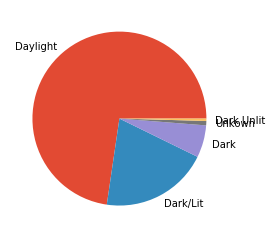

In [65]:
df.Light_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Daylight', 'Dark/Lit', 'Dark', 'Unkown', 'Dark Unlit'

ax.pie(df.Light_Conditions.value_counts(), labels=labels)

([<matplotlib.patches.Wedge at 0x11c7f2588>,
 [Text(-0.6033818407781169, 0.9197447223111483, 'Dry'),
  Text(0.5477592119144704, -0.9539181546457948, 'Wet/Damp'),
  Text(1.0969018775906831, -0.08250012689708013, 'Frost/Ice'),
  Text(1.0997828610155507, -0.021855402454543538, 'Snow'),
  Text(1.0999905049501502, -0.004570450690474121, 'Flood')])

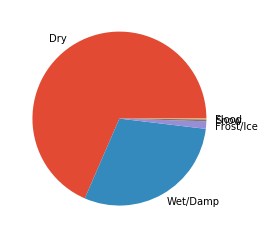

In [63]:
df.Road_Surface_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax.pie(df.Road_Surface_Conditions.value_counts(), labels=labels)

In [55]:
df.Carriageway_Hazards.value_counts()

None                                       558858
Other object in carriageway                  5284
Any animal (except a ridden horse)           3125
Pedestrian in carriageway (not injured)      1172
Involvement with previous accident            934
Dislodged vehicle load in carriageway         615
Name: Carriageway_Hazards, dtype: int64

([<matplotlib.patches.Wedge at 0x11cc5c668>,
 [Text(-0.3829523882094487, 1.0311874070045075, 'Dry'),
  Text(0.2786371496717254, -1.0641246819911738, 'Wet/Damp'),
  Text(1.0911729644087966, -0.13907394343772408, 'Frost/Ice'),
  Text(1.0992894489615321, -0.039531094114020705, 'Snow'),
  Text(1.0999587241228235, -0.009529177618800636, 'Flood')])

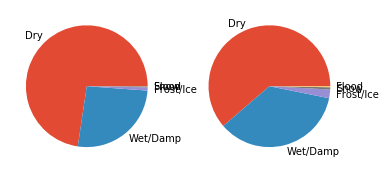

In [68]:
df.Urban_or_Rural_Area.value_counts()

fig, ax = plt.subplots(1,2)

labels = 'Urban', 'Rural', 'Other'

# ax.pie(df.Urban_or_Rural_Area.value_counts(), labels=labels)

urban = df[df["Urban_or_Rural_Area"] == 1]
rural = df[df["Urban_or_Rural_Area"] == 2]

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0].pie(urban.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1].pie(rural.Road_Surface_Conditions.value_counts(), labels=labels)

In [25]:
df.Special_Conditions_at_Site.value_counts()

None                                               555325
Roadworks                                            6877
Ol or diesel                                         2223
Mud                                                  1908
Road surface defective                               1232
Auto traffic singal out                              1177
Permanent sign or marking defective or obscured       945
Auto traffic signal partly defective                  313
Name: Special_Conditions_at_Site, dtype: int64

In [37]:
df['Pedestrian_Crossing-Human_Control'].value_counts()


None within 50 metres                 566636
Control by other authorised person      1989
Control by school crossing patrol       1369
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [36]:
df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          486482
Pedestrian phase at traffic signal junction     33157
non-junction pedestrian crossing                27472
Zebra crossing                                  12847
Central refuge                                   8638
Footbridge or subway                             1381
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

Text(0.5, 1.0, 'Slip Road')

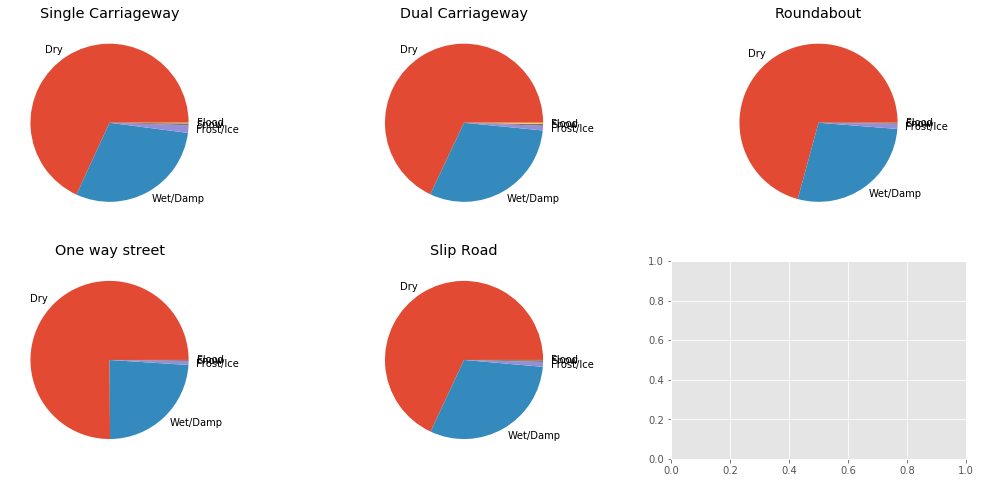

In [84]:
df.Road_Type.value_counts()

single= df[df["Road_Type"] == 'Single carriageway']
dual= df[df["Road_Type"] == 'Dual carriageway']
roundabout= df[df["Road_Type"] == 'Roundabout']
one_way= df[df["Road_Type"] == 'One way street']
slip= df[df["Road_Type"] == 'Slip road']

fig, ax = plt.subplots(2,3,figsize = (18,8))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(single.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(dual.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(roundabout.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][0].pie(one_way.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slip.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title('Single Carriageway')
ax[0][1].set_title('Dual Carriageway')
ax[0][2].set_title('Roundabout')
ax[1][0].set_title('One way street')
ax[1][1].set_title('Slip Road')

# Single carriageway    423414
# Dual carriageway       87274
# Roundabout             36637
# One way street         12434
# Slip road               5936
# Unknown                 4316

Text(0.5, 1.0, 'Speed 70, n = 44448')

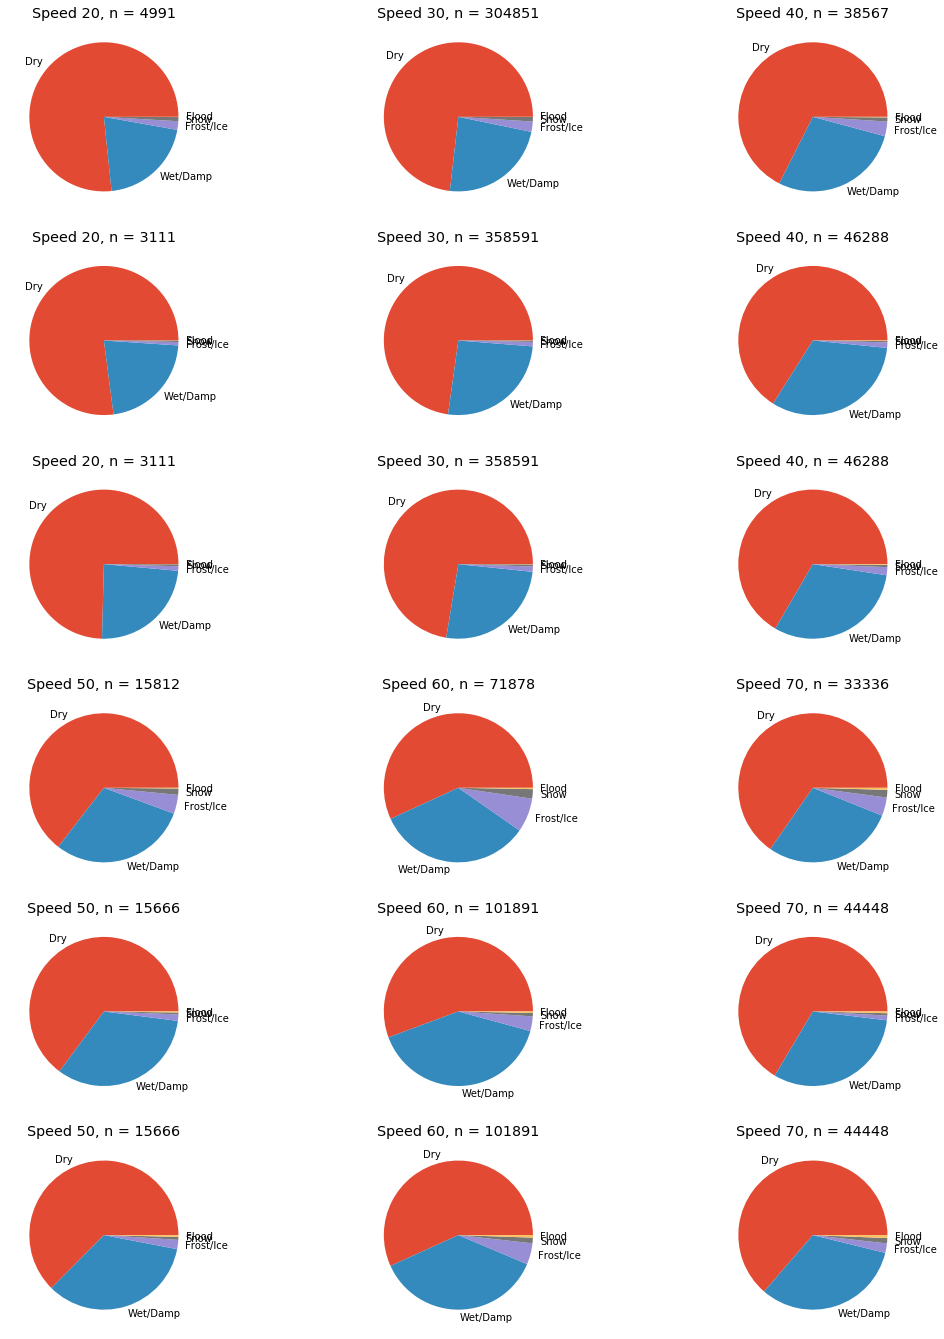

In [101]:
limit20= df2[df2["Speed_limit"] == 20]
limit30= df2[df2["Speed_limit"] == 30]
limit40= df2[df2["Speed_limit"] == 40]
limit50= df2[df2["Speed_limit"] == 50]
limit60= df2[df2["Speed_limit"] == 60]
limit70= df2[df2["Speed_limit"] == 70]
count = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in count.items():
    count[key] = len(df2[df2["Speed_limit"] == key].index)
    

slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]
counts = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in counts.items():
    counts[key] = len(df[df["Speed_limit"] == key].index)
    
sslimit20= df3[df3["Speed_limit"] == 20]
sslimit30= df3[df3["Speed_limit"] == 30]
sslimit40= df3[df3["Speed_limit"] == 40]
sslimit50= df3[df3["Speed_limit"] == 50]
sslimit60= df3[df3["Speed_limit"] == 60]
sslimit70= df3[df3["Speed_limit"] == 70]
countss = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in countss.items():
    countss[key] = len(df[df["Speed_limit"] == key].index)

fig, ax = plt.subplots(6,3,figsize = (18,24))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(limit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(limit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(limit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][0].pie(limit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][1].pie(limit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][2].pie(limit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title(f'Speed 20, n = {count[20]}')
ax[0][1].set_title(f'Speed 30, n = {count[30]}')
ax[0][2].set_title(f'Speed 40, n = {count[40]}')
ax[3][0].set_title(f'Speed 50, n = {count[50]}')
ax[3][1].set_title(f'Speed 60, n = {count[60]}')
ax[3][2].set_title(f'Speed 70, n = {count[70]}')

ax[1][0].pie(slimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][2].pie(slimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][0].pie(slimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][1].pie(slimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][2].pie(slimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[1][0].set_title(f'Speed 20, n = {counts[20]}')
ax[1][1].set_title(f'Speed 30, n = {counts[30]}')
ax[1][2].set_title(f'Speed 40, n = {counts[40]}')
ax[4][0].set_title(f'Speed 50, n = {counts[50]}')
ax[4][1].set_title(f'Speed 60, n = {counts[60]}')
ax[4][2].set_title(f'Speed 70, n = {counts[70]}')

ax[2][0].pie(sslimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][1].pie(sslimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][2].pie(sslimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][0].pie(sslimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][1].pie(sslimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][2].pie(sslimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[2][0].set_title(f'Speed 20, n = {countss[20]}')
ax[2][1].set_title(f'Speed 30, n = {countss[30]}')
ax[2][2].set_title(f'Speed 40, n = {countss[40]}')
ax[5][0].set_title(f'Speed 50, n = {countss[50]}')
ax[5][1].set_title(f'Speed 60, n = {countss[60]}')
ax[5][2].set_title(f'Speed 70, n = {countss[70]}')


Text(0.5, 1.0, 'Speed 70, n = 44448')

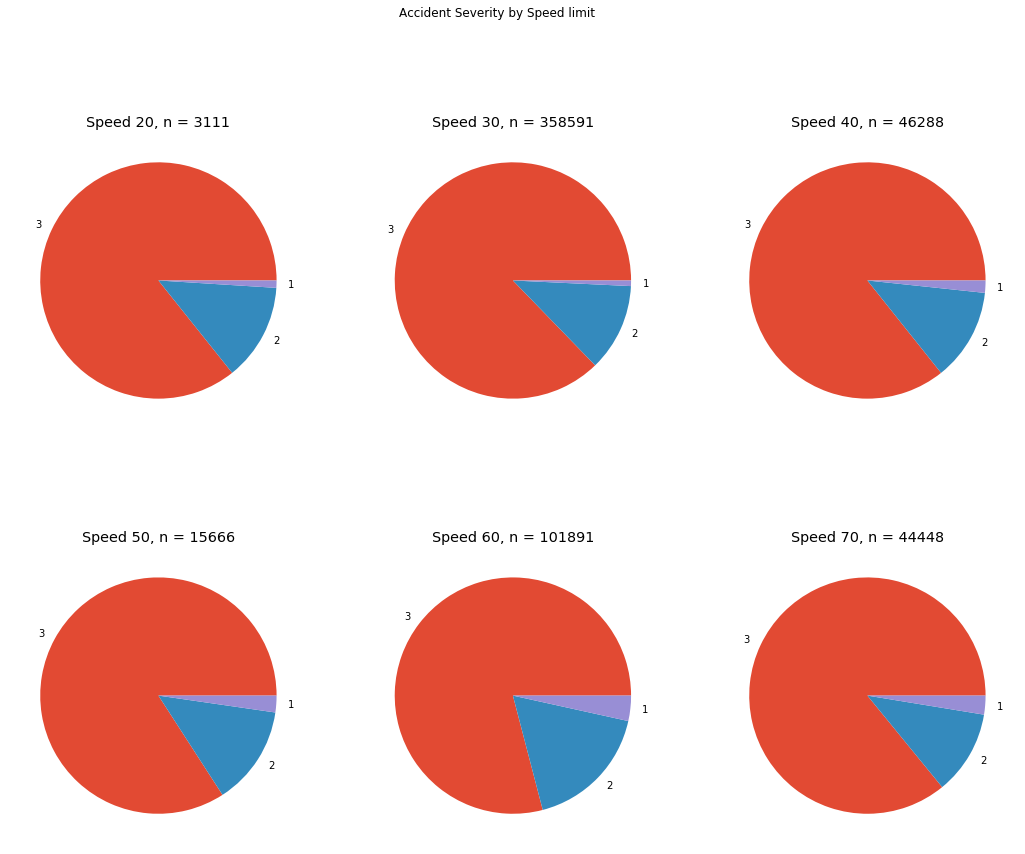

In [109]:
df.Speed_limit.value_counts()

slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]
counts = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in count.items():
    counts[key] = len(df[df["Speed_limit"] == key].index)

fig, ax = plt.subplots(2,3,figsize = (18,14))

fig.suptitle("Accident Severity by Speed limit")

labels = '3', '2', '1'

ax[0][0].pie(slimit20.Accident_Severity.value_counts(), labels=labels)
ax[0][1].pie(slimit30.Accident_Severity.value_counts(), labels=labels)
ax[0][2].pie(slimit40.Accident_Severity.value_counts(), labels=labels)
ax[1][0].pie(slimit50.Accident_Severity.value_counts(), labels=labels)
ax[1][1].pie(slimit60.Accident_Severity.value_counts(), labels=labels)
ax[1][2].pie(slimit70.Accident_Severity.value_counts(), labels=labels)

ax[0][0].set_title(f'Speed 20, n = {counts[20]}')
ax[0][1].set_title(f'Speed 30, n = {counts[30]}')
ax[0][2].set_title(f'Speed 40, n = {counts[40]}')
ax[1][0].set_title(f'Speed 50, n = {counts[50]}')
ax[1][1].set_title(f'Speed 60, n = {counts[60]}')
ax[1][2].set_title(f'Speed 70, n = {counts[70]}')

# 30    358591
# 60    101891
# 40     46288
# 70     44448
# 50     15666
# 20      3111
# 10         9
# 15         7
# Name: Speed_limit, dtype: int64

In [39]:
traffic.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [40]:
traffic.Road.value_counts()

A1         3598
A6         3271
A5         2331
A41        2270
A34        2070
A40        2053
A61        1896
A3         1758
A57        1699
A38        1621
A58        1557
M6         1500
A4         1418
A49        1409
A2         1346
M1         1346
A50        1344
A47        1309
A19        1287
A52        1280
A259       1263
A56        1258
A23        1239
A59        1167
M4         1136
A449       1088
A27        1087
A12        1062
A9         1060
A46        1059
           ... 
A4281         6
A627M         6
A627(M)       6
A4810         6
A2500         5
A4971         4
M41           3
A4510         3
A868          3
A48(M)        2
A2039         2
A6192         2
A1270         2
A2009         2
A3280         2
A1384         2
A1341         2
A5509         2
A8004         1
A5075         1
A308M         1
A6183         1
A5758         1
A5153         1
A66(M)        1
A5042         1
A823(M)       1
A1194         1
A14(M)        1
A806          1
Name: Road, Length: 1719

In [54]:
traffic.Northing.value_counts()

190000    707
185000    547
180000    545
170000    530
410000    505
400000    491
175000    452
200000    450
380000    440
390000    428
430000    412
280000    389
178000    383
395000    373
370000    364
360000    358
165000    356
425000    356
176000    353
340000    341
405000    339
300000    337
182000    336
188000    335
172000    334
179000    320
184000    316
440000    302
290000    299
420000    289
         ... 
373772      1
539483      1
211003      1
380862      1
176465      1
346691      1
188924      1
437790      1
172276      1
163494      1
434791      1
580965      1
398635      1
182960      1
395103      1
219522      1
718144      1
157048      1
299195      1
558666      1
421890      1
374193      1
456723      1
609838      1
304362      1
172559      1
204388      1
236557      1
294868      1
303138      1
Name: Northing, Length: 12673, dtype: int64

In [57]:
traffic.Estimation_method_detailed.value_counts()

Estimated using previous year's AADF on this link    159510
Manual count                                          55473
Estimated from nearby links                           15894
Dependent on a neighbouring counted link               6022
Automatic counter                                       913
Name: Estimation_method_detailed, dtype: int64

86.9275